In [596]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, mean_squared_error
import seaborn as sns
from IPython.display import display, HTML

# Read the CSV files into DataFrames
df1 = pd.read_csv('questionnaire.csv')
df2 = pd.read_csv('demographic.csv')
df3 = pd.read_csv('diet.csv')
df4 = pd.read_csv('examination.csv')

# Merge the DataFrames on the 'seqn' column
merged_df = df1.merge(df2, on='SEQN').merge(df3, on='SEQN').merge(df4, on='SEQN')

# Print the merged DataFrame
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(merged_df.shape)


(10175, 953)
(10175, 47)
(9813, 168)
(9813, 224)
(9813, 1389)


In [597]:
merged_df.isnull().sum()

SEQN           0
ACD011A     4250
ACD011B     9797
ACD011C     9649
ACD040      7506
            ... 
CSXSLTRT    8218
CSXSLTRG    8218
CSXNART     8200
CSXNARG     8200
CSAEFFRT    6276
Length: 1389, dtype: int64

In [598]:
# List of columns to keep
columns_to_keep = [
    'SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC2', 'BPXDI1', 'BPXDI2', 'BPXDI3', 'BPXSY1', 'BPXSY2', 'BPXSY3', 'PEASCST1', 'PEASCCT1', 'BMXBMI', 'BMXHT', 'BMXWAIST', 'BMXWT', 'BPQ080',
    'DRQSDIET', 'DRQSPREP', 'MCQ010', 'MCQ160F', 'CDQ001', 'OCQ210',
    'PAQ650', 'PAQ665', 'DPQ090', 'DPQ060', 'DPQ050', 'DPQ040', 'DPQ030', 'DPQ020','ALQ101','ALQ151', 'ALQ120Q', 'ALQ130', 'SMQ020', 'SMQ040', 'DBQ700', 'HSD010', 'SLD010H'
]

# Drop all columns except for the specified ones
merged_df = merged_df[columns_to_keep]

# Drop all rows where RIDAGEYR is less than 18
merged_df = merged_df[merged_df['RIDAGEYR'] >= 18]

merged_df.head()

,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,BPXDI1,BPXDI2,BPXDI3,BPXSY1,BPXSY2,BPXSY3,...,DPQ020,ALQ101,ALQ151,ALQ120Q,ALQ130,SMQ020,SMQ040,DBQ700,HSD010,SLD010H
0,73557,1,69,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,0.0,1.0,2.0,0.0,NaN,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,1.0,1.0,2.0,0.0,NaN,2.0,NaN,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [599]:
merged_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2     336
BPXDI1       498
BPXDI2       305
BPXDI3       300
BPXSY1       498
BPXSY2       305
BPXSY3       300
PEASCST1       0
PEASCCT1    5713
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
BPQ080         0
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
PAQ650         0
PAQ665         0
DPQ090       531
DPQ060       530
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ101       503
ALQ151      1447
ALQ120Q     1445
ALQ130      2328
SMQ020         0
SMQ040      3434
DBQ700         0
HSD010       480
SLD010H        3
dtype: int64

In [600]:
merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ120Q', 'ALQ130']] = merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ120Q', 'ALQ130']].fillna(0)
merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ151']] = merged_df.loc[merged_df['ALQ101'] == 2, ['ALQ151']].fillna(2)

merged_df.loc[merged_df['SMQ020'] != 1, ['SMQ040']] = merged_df.loc[merged_df['SMQ020'] != 1, ['SMQ040']].fillna(3)

merged_df.loc[merged_df['ALQ120Q'] <= 3, ['ALQ130']] = merged_df.loc[merged_df['ALQ120Q'] <= 3, ['ALQ130']].fillna(0)

In [601]:
merged_df.isnull().sum()

SEQN           0
RIAGENDR       0
RIDAGEYR       0
DMDEDUC2     336
BPXDI1       498
BPXDI2       305
BPXDI3       300
BPXSY1       498
BPXSY2       305
BPXSY3       300
PEASCST1       0
PEASCCT1    5713
BMXBMI        77
BMXHT         67
BMXWAIST     337
BMXWT         64
BPQ080         0
DRQSDIET     528
DRQSPREP     528
MCQ010         0
MCQ160F      336
CDQ001      2216
OCQ210      4996
PAQ650         0
PAQ665         0
DPQ090       531
DPQ060       530
DPQ050       529
DPQ040       529
DPQ030       529
DPQ020       528
ALQ101       503
ALQ151       507
ALQ120Q      505
ALQ130       505
SMQ020         0
SMQ040         0
DBQ700         0
HSD010       480
SLD010H        3
dtype: int64

In [602]:
merged_df.notnull().sum()

SEQN        5924
RIAGENDR    5924
RIDAGEYR    5924
DMDEDUC2    5588
BPXDI1      5426
BPXDI2      5619
BPXDI3      5624
BPXSY1      5426
BPXSY2      5619
BPXSY3      5624
PEASCST1    5924
PEASCCT1     211
BMXBMI      5847
BMXHT       5857
BMXWAIST    5587
BMXWT       5860
BPQ080      5924
DRQSDIET    5396
DRQSPREP    5396
MCQ010      5924
MCQ160F     5588
CDQ001      3708
OCQ210       928
PAQ650      5924
PAQ665      5924
DPQ090      5393
DPQ060      5394
DPQ050      5395
DPQ040      5395
DPQ030      5395
DPQ020      5396
ALQ101      5421
ALQ151      5417
ALQ120Q     5419
ALQ130      5419
SMQ020      5924
SMQ040      5924
DBQ700      5924
HSD010      5444
SLD010H     5921
dtype: int64

In [603]:
# Drop all columns with less than 2000 non-null values
merged_df = merged_df.dropna(thresh=2000, axis=1)

# Print the resulting DataFrame
print(merged_df)

       SEQN  RIAGENDR  RIDAGEYR  DMDEDUC2  BPXDI1  BPXDI2  BPXDI3  BPXSY1  \
0     73557         1        69       3.0    72.0    76.0    74.0   122.0   
1     73558         1        54       3.0    62.0    80.0    42.0   156.0   
2     73559         1        72       4.0    90.0    76.0    80.0   140.0   
4     73561         2        73       5.0    86.0    88.0    86.0   136.0   
5     73562         1        56       4.0    84.0    82.0    80.0   160.0   
...     ...       ...       ...       ...     ...     ...     ...     ...   
9804  83723         1        61       2.0     NaN    60.0    68.0     NaN   
9805  83724         1        80       3.0    70.0    66.0    66.0   164.0   
9807  83726         1        40       1.0     NaN     NaN     NaN     NaN   
9808  83727         1        26       5.0    68.0    74.0    76.0   110.0   
9810  83729         2        42       5.0    82.0    82.0    80.0   136.0   

      BPXSY2  BPXSY3  ...  DPQ020  ALQ101  ALQ151  ALQ120Q  ALQ130  SMQ020 

In [604]:
# Assuming merged_df is already defined

# Count the number of rows with any null values
rows_with_nulls = merged_df.isnull().any(axis=1).sum()

# Print the number of rows with any null values
print(f"Number of rows with any null values: {rows_with_nulls}")

Number of rows with any null values: 3195


In [605]:
# Rename the columns as specified
new_column_names = {
    'SEQN': 'ID',
    'RIAGENDR': 'Gender',
    'RIDAGEYR': 'Age',
    'BPXDI1': 'DiasBP1',
    'BPXDI2': 'DiasBP2',
    'BPXDI3': 'DiasBP3',
    'BPXSY1': 'SysBP1',
    'BPXSY2': 'SysBP2',
    'BPXSY3': 'SysBP3',
    'PEASCST1': 'BPStatus',
    'BMXBMI': 'BMI',
    'BMXHT': 'Height',
    'BMXWAIST': 'Waist',
    'BMXWT': 'Weight',
    'BPQ080': 'Cholesterol',
    'DRQSDIET': 'Diet',
    'DRQSPREP': 'SaltFreq',
    'MCQ010': 'Asthema',
    'MCQ160F': 'Stroke',
    'PAQ650': 'VigActivity',
    'PAQ665': 'ModActivity',
    'DPQ090': 'FeelSuicidal',
    'DPQ060': 'FeelLetDown',
    'DPQ050': 'FeelPoorEating',
    'DPQ040': 'FeelTired',
    'DPQ030': 'SleepTroubles',
    'DPQ020': 'FeelDep',
    'ALQ151': 'AlcConsumpMoreThanXMostDays',
    'ALQ120Q': 'AlcConsumpFreq',
    'ALQ130': 'AlcConsumpAmtPerDrinkDay',
    'SMQ020': '100Cigs',
    'DBQ700': 'OvrDietHealth',
    'HSD010': 'GenHealth',
    'SLD010H': 'SleepDuringWork',
    'SMQ040': 'Smoker',
    'OCQ210': 'WorkHoursMoreThan35',
    'DMDEDUC2': 'EducationLvl'
}

merged_df.rename(columns=new_column_names, inplace=True)

# Show the first few rows to verify the changes
merged_df.head()

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,DiasBP3,SysBP1,SysBP2,SysBP3,...,FeelDep,ALQ101,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,0.0,1.0,2.0,0.0,0.0,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,1.0,1.0,2.0,0.0,0.0,2.0,3.0,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0


In [606]:
merged_df.shape

(5924, 38)

In [607]:
merged_df.isnull().sum()

ID                                0
Gender                            0
Age                               0
EducationLvl                    336
DiasBP1                         498
DiasBP2                         305
DiasBP3                         300
SysBP1                          498
SysBP2                          305
SysBP3                          300
BPStatus                          0
BMI                              77
Height                           67
Waist                           337
Weight                           64
Cholesterol                       0
Diet                            528
SaltFreq                        528
Asthema                           0
Stroke                          336
CDQ001                         2216
VigActivity                       0
ModActivity                       0
FeelSuicidal                    531
FeelLetDown                     530
FeelPoorEating                  529
FeelTired                       529
SleepTroubles               

In [608]:
merged_df.head(20)

,ID,Gender,Age,EducationLvl,DiasBP1,DiasBP2,DiasBP3,SysBP1,SysBP2,SysBP3,...,FeelDep,ALQ101,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork
0,73557,1,69,3.0,72.0,76.0,74.0,122.0,114.0,102.0,...,0.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,2.0,7.0
1,73558,1,54,3.0,62.0,80.0,42.0,156.0,160.0,156.0,...,0.0,1.0,1.0,7.0,4.0,1.0,2.0,3.0,4.0,9.0
2,73559,1,72,4.0,90.0,76.0,80.0,140.0,140.0,146.0,...,0.0,1.0,2.0,0.0,0.0,1.0,3.0,3.0,3.0,8.0
4,73561,2,73,5.0,86.0,88.0,86.0,136.0,134.0,142.0,...,1.0,1.0,2.0,0.0,0.0,2.0,3.0,2.0,5.0,9.0
5,73562,1,56,4.0,84.0,82.0,80.0,160.0,158.0,154.0,...,3.0,1.0,2.0,5.0,1.0,1.0,3.0,5.0,5.0,5.0
7,73564,2,61,5.0,80.0,80.0,82.0,118.0,124.0,126.0,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,4.0,3.0,9.0
8,73566,2,56,3.0,74.0,72.0,72.0,128.0,124.0,114.0,...,0.0,1.0,2.0,1.0,1.0,1.0,1.0,2.0,3.0,6.0
9,73567,1,65,2.0,78.0,78.0,76.0,140.0,142.0,142.0,...,1.0,1.0,2.0,4.0,3.0,1.0,1.0,3.0,3.0,7.0
10,73568,2,26,5.0,60.0,62.0,66.0,106.0,100.0,108.0,...,0.0,1.0,2.0,2.0,2.0,2.0,3.0,2.0,1.0,8.0
12,73571,1,76,5.0,68.0,NaN,68.0,124.0,NaN,128.0,...,1.0,2.0,2.0,2.0,1.0,2.0,3.0,3.0,3.0,6.0


In [609]:
# #Add Hypertension Feature - added if either readings were high blood pressure
# merged_df['Hypertension'] = (
#     (np.minimum(merged_df['SysBP1'], merged_df['SysBP2'].fillna(float('inf'))) >= 130) |
#     (np.minimum(merged_df['DiasBP1'], merged_df['DiasBP2'].fillna(float('inf'))) >= 80)
# ).astype(int)

# merged_df.head()

In [610]:
# hypertension_count = merged_df['Hypertension'].sum()
# hypertension_count/5588*100

In [611]:
def encode_yes_no_features(df, feature_names):
    for feature_name in feature_names:
        # Apply the conditions to each specified feature
        df[feature_name] = df[feature_name].apply(lambda x: 1 if x == 1 else (0 if x == 2 else np.nan))

In [612]:
yes_no_features = ['Gender', 'Asthema', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThanXMostDays', '100Cigs', 'Cholesterol', 'Diet']
encode_yes_no_features(merged_df, yes_no_features)

In [613]:
# Break up features into yes/no categories to determine records where there is a nan
new_column_names = {
    'Gender': 'Male'
}

merged_df.rename(columns=new_column_names, inplace=True)

In [614]:
merged_df.isnull().sum()

ID                                0
Male                              0
Age                               0
EducationLvl                    336
DiasBP1                         498
DiasBP2                         305
DiasBP3                         300
SysBP1                          498
SysBP2                          305
SysBP3                          300
BPStatus                          0
BMI                              77
Height                           67
Waist                           337
Weight                           64
Cholesterol                      35
Diet                            564
SaltFreq                        528
Asthema                           5
Stroke                          341
CDQ001                         2216
VigActivity                       0
ModActivity                       0
FeelSuicidal                    531
FeelLetDown                     530
FeelPoorEating                  529
FeelTired                       529
SleepTroubles               

In [615]:
#Scale features
def scale_features(df, feature_names, threshold=6):
    for feature_name in feature_names:
        # Determine the max value in the feature that is less than the threshold
        max_scale = df[feature_name][df[feature_name] < threshold].max()
        
        # Apply the scaling operation x = x / max_scale if x is less than the threshold
        df[feature_name] = df[feature_name].apply(lambda x: x / max_scale if x < threshold else np.nan)

In [616]:
def minus_one_from_feature_rating(df, feature_names):
    for feature_name in feature_names:
        df[feature_name] = df[feature_name] -1

In [617]:
features_to_minus_one = ['SaltFreq', 'OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl']
minus_one_from_feature_rating(merged_df, features_to_minus_one)

In [618]:
features_to_scale = ['FeelSuicidal', 'FeelLetDown', 'FeelPoorEating','FeelTired','SleepTroubles','FeelDep', 'SaltFreq','OvrDietHealth', 'GenHealth', 'Smoker', 'EducationLvl']
scale_features(merged_df, features_to_scale)

In [619]:
features_to_scale = ['AlcConsumpFreq', 'AlcConsumpAmtPerDrinkDay']
scale_features(merged_df, features_to_scale, threshold=777)

features_to_scale = ['SleepDuringWork']
scale_features(merged_df, features_to_scale, threshold=77)

In [620]:
def flip_feature_scaling(df, feature_names):
    for feature_name in feature_names:
        df[feature_name] = 1 - df[feature_name]

In [621]:
features_to_flip = ['OvrDietHealth', 'GenHealth', 'Smoker']
flip_feature_scaling(merged_df, features_to_flip)

In [622]:
def print_feature_min_max(df, feature_names):
    for feature_name in feature_names:
        # Calculate minimum and maximum values for the feature
        min_value = df[feature_name].min()
        max_value = df[feature_name].max()
        
        # Print the results
        print(f"Minimum value for {feature_name}: {min_value}")
        print(f"Maximum value for {feature_name}: {max_value}")

In [623]:
max_min_features = ['Male', 'Asthema', 'Stroke', 'VigActivity', 'ModActivity', 'AlcConsumpMoreThanXMostDays', '100Cigs', 'Smoker', 'FeelTired','SleepTroubles','FeelDep', 'SaltFreq', 'OvrDietHealth', 'GenHealth']
print_feature_min_max(merged_df, max_min_features)

Minimum value for Male: 0
Maximum value for Male: 1
Minimum value for Asthema: 0.0
Maximum value for Asthema: 1.0
Minimum value for Stroke: 0.0
Maximum value for Stroke: 1.0
Minimum value for VigActivity: 0
Maximum value for VigActivity: 1
Minimum value for ModActivity: 0
Maximum value for ModActivity: 1
Minimum value for AlcConsumpMoreThanXMostDays: 0.0
Maximum value for AlcConsumpMoreThanXMostDays: 1.0
Minimum value for 100Cigs: 0.0
Maximum value for 100Cigs: 1.0
Minimum value for Smoker: 0.0
Maximum value for Smoker: 1.0
Minimum value for FeelTired: 0.0
Maximum value for FeelTired: 1.0
Minimum value for SleepTroubles: 0.0
Maximum value for SleepTroubles: 1.0
Minimum value for FeelDep: 0.0
Maximum value for FeelDep: 1.0
Minimum value for SaltFreq: 0.0
Maximum value for SaltFreq: 1.0
Minimum value for OvrDietHealth: 0.0
Maximum value for OvrDietHealth: 1.0
Minimum value for GenHealth: 0.0
Maximum value for GenHealth: 1.0


In [624]:
# List of features to plot
# features = merged_df.columns

# # Create subplots
# num_features = len(features)
# fig, axes = plt.subplots(num_features, 1, figsize=(10, 5 * num_features))

# # Plot each feature's value counts
# for i, feature in enumerate(features):
#     value_counts = merged_df[feature].value_counts()
#     axes[i].bar(value_counts.index, value_counts.values)
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Value Counts')
#     axes[i].set_title(f'Distribution of {feature}')

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [625]:
# Drop the specified columns
merged_df.drop(columns=['CDQ001', 'ALQ101', 'FeelLetDown', 'FeelSuicidal', 'FeelPoorEating', 'BPStatus', 'ID'], inplace=True)

# Set all null values for the 'Smoker' column to 0
merged_df['Smoker'].fillna(0, inplace=True)

C:\Users\larry\AppData\Local\Temp\ipykernel_3408\3068012130.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df['Smoker'].fillna(0, inplace=True)


In [626]:
# Remove rows that do not contain either DiasBP1 and SysBP1 or DiasBP2 and SysBP2
condition = ((merged_df['DiasBP1'].isnull()) | (merged_df['SysBP1'].isnull())) & ((merged_df['DiasBP2'].isnull()) | (merged_df['SysBP2'].isnull()) & (merged_df['DiasBP3'].isnull()) | (merged_df['SysBP3'].isnull()))
merged_df = merged_df.drop(merged_df[condition].index)

In [627]:
merged_df.isnull().sum()

Male                             0
Age                              0
EducationLvl                   329
DiasBP1                        260
DiasBP2                         75
DiasBP3                         80
SysBP1                         260
SysBP2                          75
SysBP3                          80
BMI                             60
Height                          51
Waist                          276
Weight                          48
Cholesterol                     30
Diet                           476
SaltFreq                       552
Asthema                          5
Stroke                         329
VigActivity                      0
ModActivity                      0
FeelTired                      463
SleepTroubles                  463
FeelDep                        467
AlcConsumpMoreThanXMostDays    443
AlcConsumpFreq                 444
AlcConsumpAmtPerDrinkDay       443
100Cigs                          2
Smoker                           0
OvrDietHealth       

In [628]:
# Drop all rows where BMI is missing
merged_df.dropna(subset=['BMI'], inplace=True)

In [629]:
# Total number of records
total_records = len(merged_df)

# Number of records with no nulls
no_nulls = merged_df.dropna().shape[0]

# Number of records with nulls
with_nulls = total_records - no_nulls

print(f"Total records: {total_records}")
print(f"Records with no nulls: {no_nulls}")
print(f"Records with nulls: {with_nulls}")

Total records: 5626
Records with no nulls: 4129
Records with nulls: 1497


REMOVING OUTLIERS

In [630]:
count_bmi_over_60 = (merged_df['BMI'] < 15).sum()

# Print the result
print(f"Number of participants with a BMI greater than 60: {count_bmi_over_60}")

Number of participants with a BMI greater than 60: 2


In [631]:
condition = (merged_df['BMI'] > 55) | (merged_df['BMI'] < 15)

# Drop rows based on the condition
merged_df = merged_df.drop(merged_df[condition].index)

In [632]:
waist_count = (merged_df['Waist'] < 60).sum()

# Print the result
print(f"Number of participants with waist smaller than 55: {waist_count}")

Number of participants with waist smaller than 55: 0


In [633]:
condition = (merged_df['Waist'] > 150)

# Drop rows based on the condition
merged_df = merged_df.drop(merged_df[condition].index)

In [634]:
def calculate_average(df, features, new_feature_name):
    # Check and select the relevant columns from the DataFrame
    relevant_columns = df[features].replace({0: np.nan})  # Replace zeros with NaN to exclude from mean calculation
    
    # Calculate the mean across the specified columns, ignoring NaN values
    df[new_feature_name] = relevant_columns.mean(axis=1, skipna=True)

In [635]:
diasBP_features = ['DiasBP1', 'DiasBP2', 'DiasBP3']
sysBP_features = ['SysBP1', 'SysBP2', 'SysBP3']

calculate_average(merged_df, diasBP_features, 'AvgDiasBP')
calculate_average(merged_df, sysBP_features, 'AvgSysBP')

merged_df.head(20)

,Male,Age,EducationLvl,DiasBP1,DiasBP2,DiasBP3,SysBP1,SysBP2,SysBP3,BMI,...,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork,AvgDiasBP,AvgSysBP
0,1,69,0.50,72.0,76.0,74.0,122.0,114.0,102.0,26.7,...,1.0,0.002740,0.04,1.0,0.0,0.75,0.75,0.583333,74.000000,112.666667
1,1,54,0.50,62.0,80.0,42.0,156.0,160.0,156.0,28.6,...,1.0,0.019178,0.16,1.0,0.5,0.50,0.25,0.750000,61.333333,157.333333
2,1,72,0.75,90.0,76.0,80.0,140.0,140.0,146.0,28.9,...,0.0,0.000000,0.00,1.0,0.0,0.50,0.50,0.666667,82.000000,142.000000
4,0,73,1.00,86.0,88.0,86.0,136.0,134.0,142.0,19.7,...,0.0,0.000000,0.00,0.0,0.0,0.75,0.00,0.750000,86.666667,137.333333
5,1,56,0.75,84.0,82.0,80.0,160.0,158.0,154.0,41.7,...,0.0,0.013699,0.04,1.0,0.0,0.00,0.00,0.416667,82.000000,157.333333
7,0,61,1.00,80.0,80.0,82.0,118.0,124.0,126.0,35.7,...,0.0,0.005479,0.04,0.0,0.0,0.25,0.50,0.750000,80.666667,122.666667
8,0,56,0.50,74.0,72.0,72.0,128.0,124.0,114.0,26.5,...,0.0,0.002740,0.04,1.0,1.0,0.75,0.50,0.500000,72.666667,122.000000
9,1,65,0.25,78.0,78.0,76.0,140.0,142.0,142.0,22.0,...,0.0,0.010959,0.12,1.0,1.0,0.50,0.50,0.583333,77.333333,141.333333
10,0,26,1.00,60.0,62.0,66.0,106.0,100.0,108.0,20.3,...,0.0,0.005479,0.08,0.0,0.0,0.75,1.00,0.666667,62.666667,104.666667
12,1,76,1.00,68.0,NaN,68.0,124.0,NaN,128.0,34.4,...,0.0,0.005479,0.04,0.0,0.0,0.50,0.50,0.500000,68.000000,126.000000


In [636]:
condition = (
    (merged_df['AvgSysBP'] > 180)
)

# Drop the rows where the condition is True
merged_df = merged_df[~condition]

In [637]:
#May be removed
condition = (
    (merged_df['AvgSysBP'] < 80) |
    (merged_df['AvgDiasBP'] < 45)
)

# Selecting blood pressure related columns to display
# Drop the rows where the condition is True
print(merged_df[condition])
merged_df = merged_df[~condition]

      Male  Age  EducationLvl  DiasBP1  DiasBP2  DiasBP3  SysBP1  SysBP2  \
39       1   20          0.25     42.0     44.0     38.0   114.0   112.0   
148      1   18           NaN     36.0      0.0     26.0   114.0   118.0   
251      0   56          1.00     60.0     42.0      NaN    82.0    76.0   
681      0   46          0.25      0.0     42.0      0.0   130.0   134.0   
693      0   62          0.25     48.0     40.0     46.0   110.0   114.0   
...    ...  ...           ...      ...      ...      ...     ...     ...   
9119     0   80          1.00     36.0     32.0     44.0   118.0   110.0   
9171     0   71          1.00     40.0     28.0     38.0   128.0   124.0   
9183     0   23          0.25     34.0     54.0     46.0   118.0   120.0   
9668     1   20          0.50      0.0      0.0     38.0   118.0   122.0   
9730     0   20          0.50     32.0     34.0     36.0   108.0   110.0   

      SysBP3   BMI  ...  AlcConsumpMoreThanXMostDays  AlcConsumpFreq  \
39     110.0  3

In [638]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'merged_df' is your DataFrame and you want to normalize all numeric columns
scaler = MinMaxScaler()

# Select numeric columns to normalize
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns

features_to_normalise = ['Age', 'BMI', 'Height', 'Waist', 'Weight']

# Fit and transform the data
merged_df[features_to_normalise] = scaler.fit_transform(merged_df[features_to_normalise])

# Display the first few rows to verify the changes
merged_df.head()

,Male,Age,EducationLvl,DiasBP1,DiasBP2,DiasBP3,SysBP1,SysBP2,SysBP3,BMI,...,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork,AvgDiasBP,AvgSysBP
0,1,0.822581,0.50,72.0,76.0,74.0,122.0,114.0,102.0,0.294118,...,1.0,0.002740,0.04,1.0,0.0,0.75,0.75,0.583333,74.000000,112.666667
1,1,0.580645,0.50,62.0,80.0,42.0,156.0,160.0,156.0,0.342711,...,1.0,0.019178,0.16,1.0,0.5,0.50,0.25,0.750000,61.333333,157.333333
2,1,0.870968,0.75,90.0,76.0,80.0,140.0,140.0,146.0,0.350384,...,0.0,0.000000,0.00,1.0,0.0,0.50,0.50,0.666667,82.000000,142.000000
4,0,0.887097,1.00,86.0,88.0,86.0,136.0,134.0,142.0,0.115090,...,0.0,0.000000,0.00,0.0,0.0,0.75,0.00,0.750000,86.666667,137.333333
5,1,0.612903,0.75,84.0,82.0,80.0,160.0,158.0,154.0,0.677749,...,0.0,0.013699,0.04,1.0,0.0,0.00,0.00,0.416667,82.000000,157.333333


In [639]:
# features = merged_df.columns

# # Create subplots
# num_features = len(features)
# fig, axes = plt.subplots(num_features, 1, figsize=(10, 8 * num_features))  # Reduced the vertical size multiplier for a less tall figure

# # Plot each feature's value counts
# for i, feature in enumerate(features):
#     value_counts = merged_df[feature].value_counts().sort_index()  # Sort the value counts by index
#     axes[i].bar(value_counts.index.astype(str), value_counts.values, width=0.4)  # Convert index to string if necessary and adjust bar width
#     axes[i].set_xlabel(feature)
#     axes[i].set_ylabel('Value Counts')
#     axes[i].set_title(f'Distribution of {feature}')
#     axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels to 45 degrees for better readability

# # Adjust layout
# plt.tight_layout()
# plt.show()

In [640]:
# Drop SysBP1, SysBP2, DiasBP1, and DiasBP2 columns
# Droping all readings except for avg
merged_df.drop(columns=['SysBP1', 'DiasBP1', 'SysBP2', 'DiasBP2', 'SysBP3', 'DiasBP3'], inplace=True)
merged_df.head()

,Male,Age,EducationLvl,BMI,Height,Waist,Weight,Cholesterol,Diet,SaltFreq,...,AlcConsumpMoreThanXMostDays,AlcConsumpFreq,AlcConsumpAmtPerDrinkDay,100Cigs,Smoker,OvrDietHealth,GenHealth,SleepDuringWork,AvgDiasBP,AvgSysBP
0,1,0.822581,0.50,0.294118,0.534226,0.436795,0.282036,1.0,0.0,1.000000,...,1.0,0.002740,0.04,1.0,0.0,0.75,0.75,0.583333,74.000000,112.666667
1,1,0.580645,0.50,0.342711,0.616071,0.522573,0.350705,1.0,0.0,0.666667,...,1.0,0.019178,0.16,1.0,0.5,0.50,0.25,0.750000,61.333333,157.333333
2,1,0.870968,0.75,0.350384,0.593750,0.540632,0.347026,1.0,1.0,0.333333,...,0.0,0.000000,0.00,1.0,0.0,0.50,0.50,0.666667,82.000000,142.000000
4,0,0.887097,1.00,0.115090,0.401786,NaN,0.120785,0.0,1.0,1.000000,...,0.0,0.000000,0.00,0.0,0.0,0.75,0.00,0.750000,86.666667,137.333333
5,1,0.612903,0.75,0.677749,0.346726,0.697517,0.445739,1.0,0.0,0.666667,...,0.0,0.013699,0.04,1.0,0.0,0.00,0.00,0.416667,82.000000,157.333333


In [641]:
# Drop all rows that have null values in them
merged_df.dropna(inplace=True)
merged_df.shape

(4285, 27)

In [642]:
target_sys = merged_df['AvgSysBP']
target_dias = merged_df['AvgDiasBP']
train_df = merged_df.drop(columns=['AvgSysBP', 'AvgDiasBP'])

In [643]:
# Drop the specified columns from train_df
columns_to_drop = ['Height', 'Weight', 'SleepTroubles', 'FeelDep', 'AlcConsumpFreq']
train_df.drop(columns=columns_to_drop, inplace=True)

In [644]:
# Assuming 'merged_df' is your DataFrame and 'target' is the column you want to predict
X = train_df
y_sys = target_sys  # Target variable
y_dias = target_dias

# Perform train-test split
X_train, X_test, y_train_sys, y_test_sys = train_test_split(X, y_sys, test_size=0.25, random_state=42)
X_train, X_test, y_train_dias, y_test_dias = train_test_split(X, y_dias, test_size=0.25, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 3213
Test set size: 1072


In [645]:
model_sys = LinearRegression()
model_dias = LinearRegression()

# Training the model
model_sys.fit(X_train, y_train_sys)

model_dias.fit(X_train, y_train_dias)

# Making predictions on the test set
y_pred_sys = model_sys.predict(X_test)
y_pred_dias = model_dias.predict(X_test)

# Evaluating the model
mse_sys = mean_squared_error(y_test_sys, y_pred_sys)
print(f"Mean Squared Error Sys: {mse_sys}")
mse_dias = mean_squared_error(y_test_dias, y_pred_dias)
print(f"Mean Squared Error Sys: {mse_dias}")

Mean Squared Error Sys: 206.87271404257655
Mean Squared Error Sys: 103.79214652677165


In [646]:
def comparitive_df(y_test_sys,y_pred_sys, y_test_dias, y_pred_dias):
    compare_df = pd.DataFrame({
    'Actual_SysBP': y_test_sys,
    'Predicted_SysBP': y_pred_sys,
    'Actual_DiasBP': y_test_dias,
    'Predicted_DiasBP': y_pred_dias
    })

    # Resetting the index if necessary (to ensure the indices of predictions match those of the actual values)
    compare_df.reset_index(drop=True, inplace=True)
    
    return compare_df

In [647]:
# Creating a DataFrame with the actual and predicted values
compare_df = comparitive_df(y_test_sys,y_pred_sys, y_test_dias, y_pred_dias)
print(compare_df.head())

   Actual_SysBP  Predicted_SysBP  Actual_DiasBP  Predicted_DiasBP
0    116.000000       126.009788      70.666667         70.318114
1    112.666667       126.765178      66.666667         68.600821
2    106.666667       123.292298      72.000000         72.110180
3    141.000000       116.223540      88.000000         67.403647
4    119.000000       112.738941      67.000000         68.448091


In [648]:
def calculate_hypertension_old(df, feature_sys, feature_dias, feature_type):

    conditions = [
        (df[feature_sys] >= 180) | (df[feature_dias] >= 120),
        (df[feature_sys] >= 140) | (df[feature_dias] >= 90),
        (df[feature_sys] >= 130) | (df[feature_dias] >= 80),
        (df[feature_sys] >= 120),
        (df[feature_sys] < 120)
    ]

    choices = [1, 2, 3, 4, 5]

    df[feature_type] = np.select(conditions, choices, default=np.nan)


In [649]:
def calculate_hypertension(df, feature_sys, feature_dias, feature_type):
    # Define the condition for hypertension
    condition = (df[feature_sys] >= 130) | (df[feature_dias] >= 80)
    
    # Apply the condition and set the new feature_type column
    df[feature_type] = np.where(condition, 1, 0)
    
    return df

In [650]:
calculate_hypertension(compare_df, 'Actual_SysBP', 'Actual_DiasBP', 'Actual_Categorisation')
calculate_hypertension(compare_df, 'Predicted_SysBP', 'Predicted_DiasBP', 'Predicted_Categorisation')

,Actual_SysBP,Predicted_SysBP,Actual_DiasBP,Predicted_DiasBP,Actual_Categorisation,Predicted_Categorisation
0,116.000000,126.009788,70.666667,70.318114,0,0
1,112.666667,126.765178,66.666667,68.600821,0,0
2,106.666667,123.292298,72.000000,72.110180,0,0
3,141.000000,116.223540,88.000000,67.403647,1,0
4,119.000000,112.738941,67.000000,68.448091,0,0
...,...,...,...,...,...,...
1067,114.000000,112.531707,71.333333,69.616495,0,0
1068,131.333333,133.822723,74.666667,72.143588,1,1
1069,110.000000,119.334215,70.666667,70.354246,0,0
1070,158.666667,136.380511,74.666667,72.689968,1,1


In [651]:
def calculate_agreement_percentage(df, col1, col2):

    # Calculate the number of matches
    matches = (df[col1] == df[col2]).sum()
    
    # Calculate the total number of rows
    total_rows = df.shape[0]
    
    # Calculate the percentage of matches
    if total_rows > 0:
        percentage = (matches / total_rows) * 100
    else:
        percentage = 0  # To handle cases where the DataFrame might be empty
    
    return percentage

In [652]:
# Example usage:
# Assuming 'merged_df' is your DataFrame and contains the columns 'Actual_Categorisation' and 'Predicted_Categorisation'
percentage_match = calculate_agreement_percentage(compare_df, 'Actual_Categorisation', 'Predicted_Categorisation')
print(f"Percentage of matching values: {percentage_match}%")

Percentage of matching values: 67.53731343283582%


In [653]:
print_feature_min_max(compare_df, ['Predicted_SysBP', 'Predicted_DiasBP'])

Minimum value for Predicted_SysBP: 103.2932616400594
Maximum value for Predicted_SysBP: 144.17846531049503
Minimum value for Predicted_DiasBP: 62.07943062672851
Maximum value for Predicted_DiasBP: 76.97354432147807


In [654]:
display(HTML(compare_df.to_html(max_rows=100, max_cols=100, notebook=True)))

,Actual_SysBP,Predicted_SysBP,Actual_DiasBP,Predicted_DiasBP,Actual_Categorisation,Predicted_Categorisation
0,116.000000,126.009788,70.666667,70.318114,0,0
1,112.666667,126.765178,66.666667,68.600821,0,0
2,106.666667,123.292298,72.000000,72.110180,0,0
3,141.000000,116.223540,88.000000,67.403647,1,0
4,119.000000,112.738941,67.000000,68.448091,0,0
5,128.666667,114.076875,51.000000,69.207394,0,0
6,115.333333,125.458161,78.666667,66.747766,0,0
7,134.666667,135.430699,47.000000,73.010086,1,1
8,116.666667,129.507225,81.333333,74.215873,1,0
9,100.666667,116.768711,74.666667,69.621614,0,0


In [655]:
#Other model:
model_sys = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
model_dias = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
model_sys.fit(X_train, y_train_sys)
model_dias.fit(X_train, y_train_dias)

# Making predictions on the test set
y_pred_sys = model_sys.predict(X_test)
y_pred_dias = model_dias.predict(X_test)

# Evaluating the model
mse_sys = mean_squared_error(y_test_sys, y_pred_sys)
mse_dias = mean_squared_error(y_test_dias, y_pred_dias)

print(f"Mean Squared Error for Systolic BP: {mse_sys}")
print(f"Mean Squared Error for Diastolic BP: {mse_dias}")

Mean Squared Error for Systolic BP: 209.44781145315096
Mean Squared Error for Diastolic BP: 96.38399975124376


In [656]:
compare_df = comparitive_df(y_test_sys,y_pred_sys, y_test_dias, y_pred_dias)
calculate_hypertension(compare_df, 'Actual_SysBP', 'Actual_DiasBP', 'Actual_Categorisation')
calculate_hypertension(compare_df, 'Predicted_SysBP', 'Predicted_DiasBP', 'Predicted_Categorisation')
percentage_match = calculate_agreement_percentage(compare_df, 'Actual_Categorisation', 'Predicted_Categorisation')
print(f"Percentage of matching values: {percentage_match}%")

Percentage of matching values: 66.97761194029852%


In [657]:
print_feature_min_max(compare_df, ['Predicted_SysBP', 'Predicted_DiasBP'])

Minimum value for Predicted_SysBP: 101.53999999999996
Maximum value for Predicted_SysBP: 159.64999999999998
Minimum value for Predicted_DiasBP: 57.72666666666665
Maximum value for Predicted_DiasBP: 86.77999999999999


In [658]:
display(HTML(compare_df.to_html(max_rows=100, max_cols=100, notebook=True)))

,Actual_SysBP,Predicted_SysBP,Actual_DiasBP,Predicted_DiasBP,Actual_Categorisation,Predicted_Categorisation
0,116.000000,125.296667,70.666667,71.620000,0,0
1,112.666667,125.136667,66.666667,76.180000,0,0
2,106.666667,127.130000,72.000000,76.843333,0,0
3,141.000000,122.846667,88.000000,71.360000,1,0
4,119.000000,114.416667,67.000000,64.866667,0,0
5,128.666667,114.860000,51.000000,66.186667,0,0
6,115.333333,129.260000,78.666667,71.210000,0,0
7,134.666667,138.520000,47.000000,65.093333,1,1
8,116.666667,132.226667,81.333333,76.893333,1,1
9,100.666667,118.803333,74.666667,71.113333,0,0


In [659]:
# Initialize the Gradient Boosting Regressor
model_sys = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_dias = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model_sys.fit(X_train, y_train_sys)
model_dias.fit(X_train, y_train_dias)

# Making predictions
y_pred_sys = model_sys.predict(X_test)
y_pred_dias = model_dias.predict(X_test)

# Evaluating the model
mse_sys = mean_squared_error(y_test_sys, y_pred_sys)
mse_dias = mean_squared_error(y_test_dias, y_pred_dias)

print(f"Mean Squared Error for Systolic BP: {mse_sys}")
print(f"Mean Squared Error for Diastolic BP: {mse_dias}")



Mean Squared Error for Systolic BP: 202.051185329932
Mean Squared Error for Diastolic BP: 94.9833800381944


In [660]:
compare_df = comparitive_df(y_test_sys,y_pred_sys, y_test_dias, y_pred_dias)
calculate_hypertension(compare_df, 'Actual_SysBP', 'Actual_DiasBP', 'Actual_Categorisation')
calculate_hypertension(compare_df, 'Predicted_SysBP', 'Predicted_DiasBP', 'Predicted_Categorisation')
percentage_match = calculate_agreement_percentage(compare_df, 'Actual_Categorisation', 'Predicted_Categorisation')
print(f"Percentage of matching values: {percentage_match}%")

Percentage of matching values: 66.51119402985076%


In [661]:
print_feature_min_max(compare_df, ['Predicted_SysBP', 'Predicted_DiasBP'])

Minimum value for Predicted_SysBP: 102.13314553172819
Maximum value for Predicted_SysBP: 146.55125671445924
Minimum value for Predicted_DiasBP: 55.7435656213071
Maximum value for Predicted_DiasBP: 80.96381875808721


In [662]:
display(HTML(compare_df.to_html(max_rows=100, max_cols=100, notebook=True)))

,Actual_SysBP,Predicted_SysBP,Actual_DiasBP,Predicted_DiasBP,Actual_Categorisation,Predicted_Categorisation
0,116.000000,124.607893,70.666667,73.198790,0,0
1,112.666667,123.518970,66.666667,71.544363,0,0
2,106.666667,124.952616,72.000000,75.865023,0,0
3,141.000000,123.667824,88.000000,74.518680,1,0
4,119.000000,116.096731,67.000000,64.239316,0,0
5,128.666667,113.971073,51.000000,63.646755,0,0
6,115.333333,129.287024,78.666667,70.874319,0,0
7,134.666667,133.376609,47.000000,70.136276,1,1
8,116.666667,129.669097,81.333333,76.216157,1,0
9,100.666667,112.577735,74.666667,70.080038,0,0


OLD

In [663]:
# Define the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")

# Assuming you have already trained the logistic regression model and have X_val and y_val ready
# Make predictions on the validation set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.show()

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate the percentages
total = tn + fp + fn + tp
false_positive_percentage = (fp / total) * 100
true_positive_percentage = (tp / total) * 100
false_negative_percentage = (fn / total) * 100
true_negative_percentage = (tn / total) * 100

# Create a DataFrame with the true labels, predicted probabilities, and whether the prediction was correct
df_predictions = pd.DataFrame({
    'true': y_test,
    'pred_prob': y_pred_prob,
    'correct': y_test == y_pred
})

# Create a histogram of predicted probabilities, colored by whether the prediction was correct
plt.figure(figsize=(10, 6))
plt.hist([df_predictions.loc[df_predictions['correct'], 'pred_prob'], df_predictions.loc[~df_predictions['correct'], 'pred_prob']], 
         bins=np.linspace(0, 1, 21), stacked=False, color=['skyblue', 'red'], label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

NameError: name 'y_train' is not defined

Accuracy: 0.68


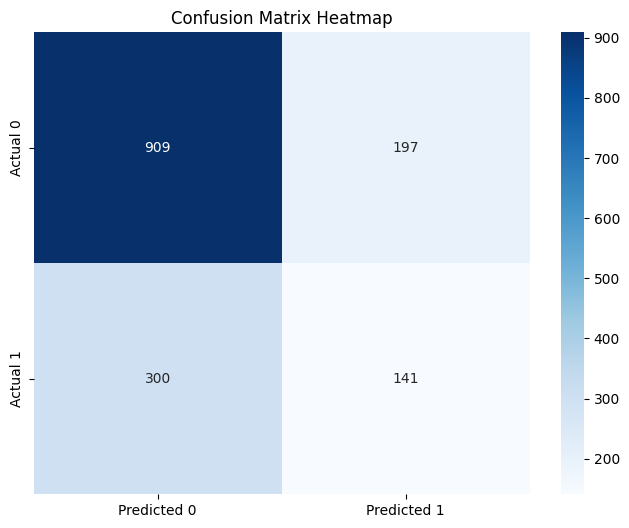

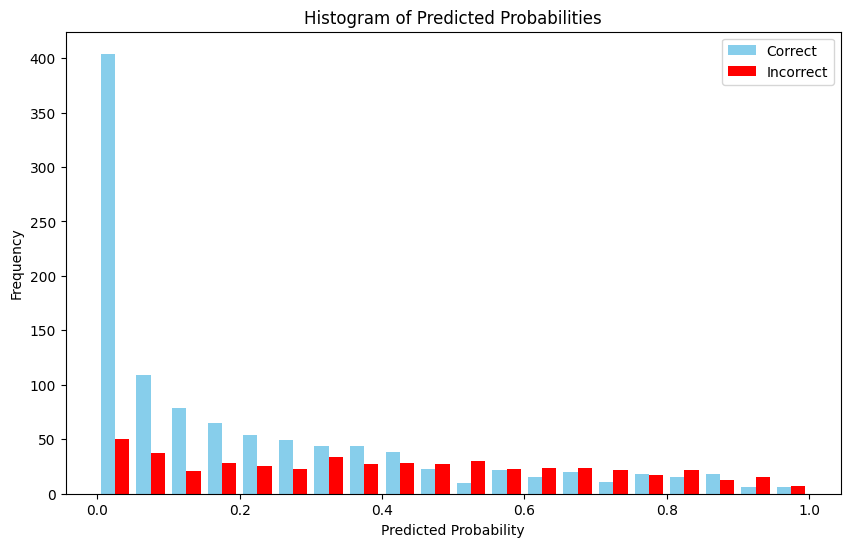

In [ ]:
# Define the XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.show()

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate the percentages
total = tn + fp + fn + tp
false_positive_percentage = (fp / total) * 100
true_positive_percentage = (tp / total) * 100
false_negative_percentage = (fn / total) * 100
true_negative_percentage = (tn / total) * 100

# Create a DataFrame with the true labels, predicted probabilities, and whether the prediction was correct
df_predictions = pd.DataFrame({
    'true': y_test,
    'pred_prob': y_pred_prob,
    'correct': y_test == y_pred
})

# Create a histogram of predicted probabilities, colored by whether the prediction was correct
plt.figure(figsize=(10, 6))
plt.hist([df_predictions.loc[df_predictions['correct'], 'pred_prob'], df_predictions.loc[~df_predictions['correct'], 'pred_prob']], 
         bins=np.linspace(0, 1, 21), stacked=False, color=['skyblue', 'red'], label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()

Accuracy: 0.71


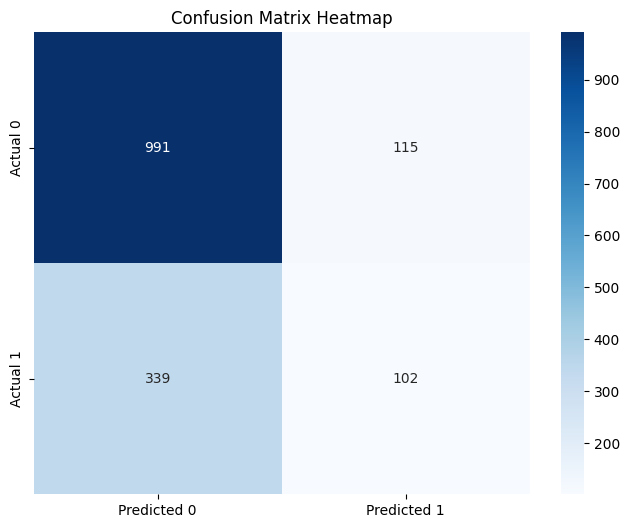

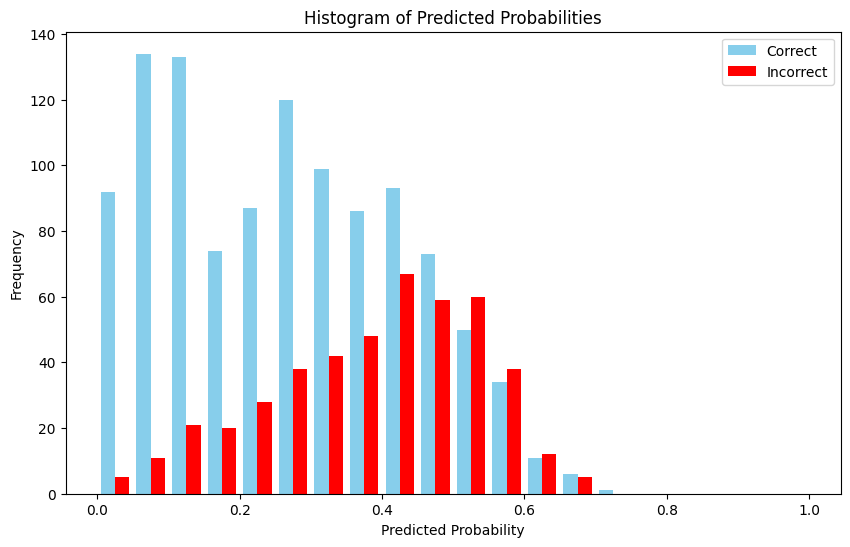

In [ ]:
# Define the Random Forest model
model = RandomForestClassifier()

# Fit the model
model.fit(X_train, y_train)


# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Make predictions on the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = y_pred_prob >= 0.5

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=True, xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.show()

# Extract the values from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate the percentages
total = tn + fp + fn + tp
false_positive_percentage = (fp / total) * 100
true_positive_percentage = (tp / total) * 100
false_negative_percentage = (fn / total) * 100
true_negative_percentage = (tn / total) * 100

# Create a DataFrame with the true labels, predicted probabilities, and whether the prediction was correct
df_predictions = pd.DataFrame({
    'true': y_test,
    'pred_prob': y_pred_prob,
    'correct': y_test == y_pred
})

# Create a histogram of predicted probabilities, colored by whether the prediction was correct
plt.figure(figsize=(10, 6))
plt.hist([df_predictions.loc[df_predictions['correct'], 'pred_prob'], df_predictions.loc[~df_predictions['correct'], 'pred_prob']], 
         bins=np.linspace(0, 1, 21), stacked=False, color=['skyblue', 'red'], label=['Correct', 'Incorrect'])
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities')
plt.legend()
plt.show()